In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt

from s7_datasets import load_data_S7
from utils import train_S7,test_S7,plot_acc_loss_S7

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
use_cuda = torch.cuda.is_available()  # Check if CUDA (GPU support) is available
device = torch.device("cuda" if use_cuda else "cpu")  # Select GPU if available, otherwise fall back to CPU
device  # Display the selected device

device(type='cpu')

In [3]:
trainloader , testloader = load_data_S7()

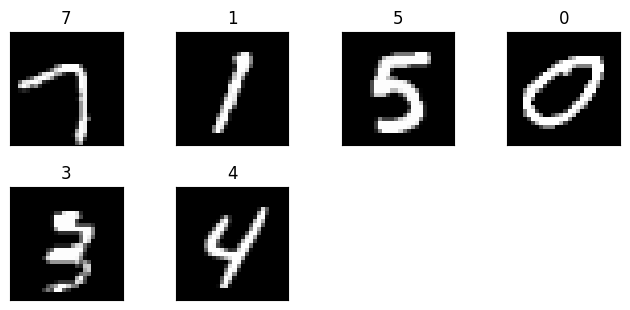

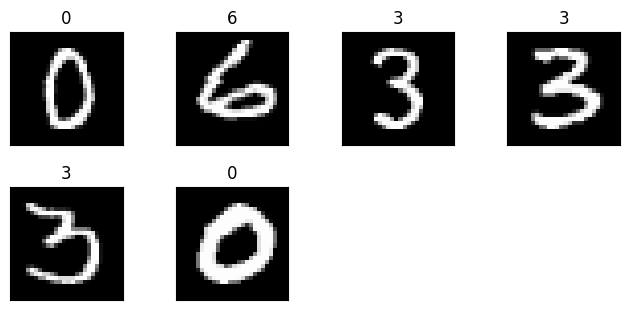

In [4]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(trainloader,6)
plot_image(testloader,6)

In [5]:
from models import model_summary,S7_Model_5
model = S7_Model_5()
model_summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]           1,450
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
         MaxPool2d-7           [-1, 10, 12, 12]               0
            Conv2d-8           [-1, 12, 12, 12]             132
       BatchNorm2d-9           [-1, 12, 12, 12]              24
             ReLU-10           [-1, 12, 12, 12]               0
           Conv2d-11           [-1, 12, 10, 10]           1,308
      BatchNorm2d-12           [-1, 12, 10, 10]              24
             ReLU-13           [-1, 12, 10, 10]               0
        MaxPool2d-14             [-1, 1

In [6]:
model = S7_Model_5().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_S7(model, device, trainloader, optimizer,criterion)
  scheduler.step()
  test_S7(model, device, testloader, criterion)
  


c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.0437 Batch_id=937 Accuracy=89.95: 100%|██████████| 938/938 [02:32<00:00,  6.15it/s]


Test set: Average loss: 0.0014, Accuracy: 9742/10000 (97.42%)

Epoch 2


Train: Loss=0.0437 Batch_id=937 Accuracy=97.24: 100%|██████████| 938/938 [02:35<00:00,  6.02it/s]


Test set: Average loss: 0.0010, Accuracy: 9802/10000 (98.02%)

Epoch 3


Train: Loss=0.0389 Batch_id=937 Accuracy=97.82: 100%|██████████| 938/938 [02:35<00:00,  6.03it/s]


Test set: Average loss: 0.0009, Accuracy: 9820/10000 (98.20%)

Epoch 4


Train: Loss=0.1627 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [02:37<00:00,  5.97it/s]


Test set: Average loss: 0.0009, Accuracy: 9832/10000 (98.32%)

Epoch 5


Train: Loss=0.0337 Batch_id=937 Accuracy=98.32: 100%|██████████| 938/938 [02:37<00:00,  5.95it/s]


Test set: Average loss: 0.0009, Accuracy: 9814/10000 (98.14%)

Epoch 6


Train: Loss=0.0734 Batch_id=937 Accuracy=98.49: 100%|██████████| 938/938 [02:31<00:00,  6.18it/s]


Test set: Average loss: 0.0008, Accuracy: 9847/10000 (98.47%)

Epoch 7


Train: Loss=0.0084 Batch_id=937 Accuracy=98.91: 100%|██████████| 938/938 [02:29<00:00,  6.26it/s]


Test set: Average loss: 0.0006, Accuracy: 9867/10000 (98.67%)

Epoch 8


Train: Loss=0.1125 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [02:27<00:00,  6.35it/s]


Test set: Average loss: 0.0007, Accuracy: 9869/10000 (98.69%)

Epoch 9


Train: Loss=0.0030 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [02:29<00:00,  6.29it/s]


Test set: Average loss: 0.0006, Accuracy: 9870/10000 (98.70%)

Epoch 10


Train: Loss=0.0043 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [02:46<00:00,  5.64it/s]


Test set: Average loss: 0.0006, Accuracy: 9873/10000 (98.73%)

Epoch 11


Train: Loss=0.0093 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [02:37<00:00,  5.94it/s]


Test set: Average loss: 0.0006, Accuracy: 9874/10000 (98.74%)

Epoch 12


Train: Loss=0.0538 Batch_id=937 Accuracy=99.13: 100%|██████████| 938/938 [01:44<00:00,  8.95it/s]


Test set: Average loss: 0.0007, Accuracy: 9868/10000 (98.68%)

Epoch 13


Train: Loss=0.0507 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [01:09<00:00, 13.43it/s]


Test set: Average loss: 0.0006, Accuracy: 9873/10000 (98.73%)

Epoch 14


Train: Loss=0.0017 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [01:12<00:00, 13.02it/s]


Test set: Average loss: 0.0006, Accuracy: 9872/10000 (98.72%)

Epoch 15


Train: Loss=0.0104 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [01:10<00:00, 13.37it/s]


Test set: Average loss: 0.0006, Accuracy: 9875/10000 (98.75%)



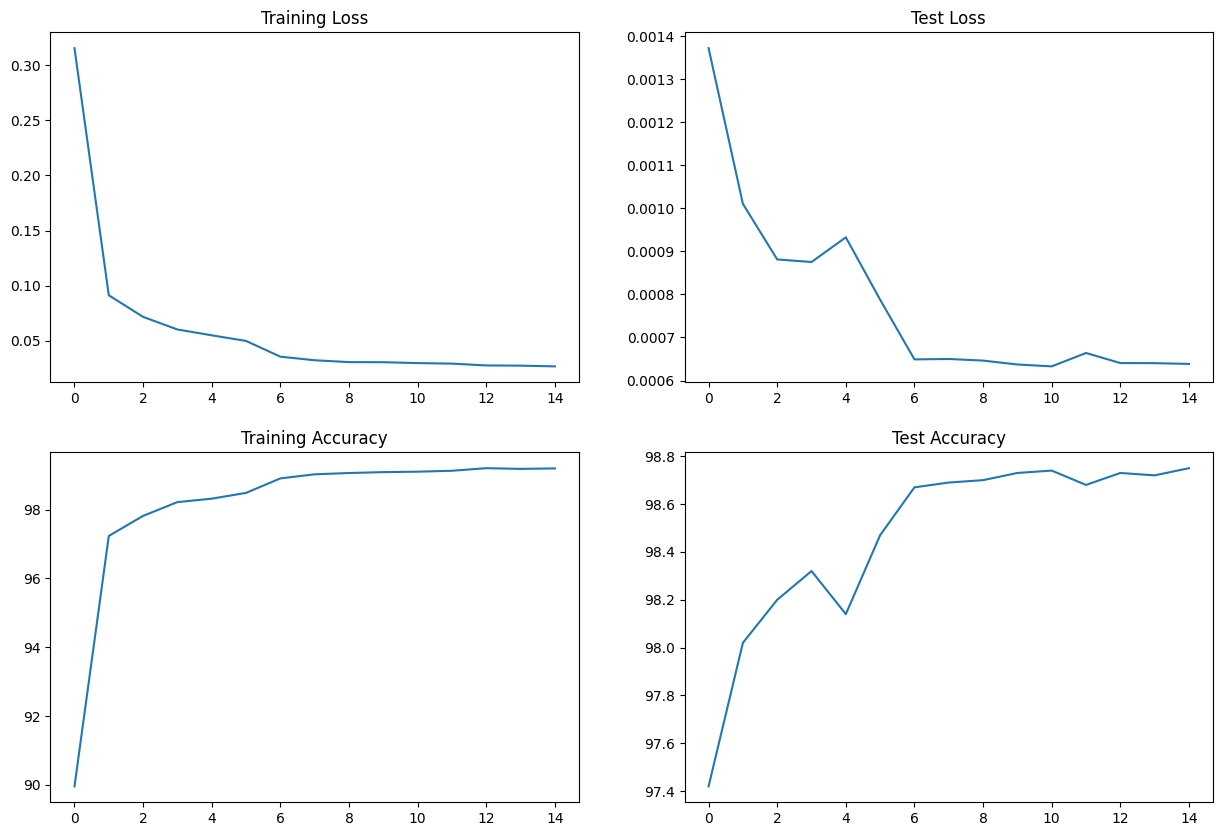

In [7]:
plot_acc_loss_S7()

Output size (n_out): 26, Jump in output (j_out): 1, Receptive field (r_out): 3
Output size (n_out): 24, Jump in output (j_out): 1, Receptive field (r_out): 5
Output size (n_out): 12, Jump in output (j_out): 2, Receptive field (r_out): 5
Output size (n_out): 10, Jump in output (j_out): 2, Receptive field (r_out): 9
Output size (n_out): 5, Jump in output (j_out): 4, Receptive field (r_out): 9
Output size (n_out): 3, Jump in output (j_out): 4, Receptive field (r_out): 17
Output size (n_out): 1, Jump in output (j_out): 4, Receptive field (r_out): 25


25